---

## 목차
1. [생성 모델링](#생성-모델링)
2. [Pix2Pix](#pix2pix)
3. [CycleGAN](#cyclegan)
4. [Neural Style Transfer](#neural-style-transfer)
5. [Fashion MNIST](#fashion-mnist)
6. [생성자 구현](#생성자-구현)
7. [판별자 구현](#판별자-구현)
8. [손실함수와 최적화함수](#손실함수와-최적화함수)
9. [모델 훈련](#모델-훈련)

---

## 생성 모델링

- 생성 모델링은  없던 데이터를 생성해 내는 것을 목표로 한다.
- 데이터셋에서 각 이미지의 특징을 학습해 그와 비슷한 새로운 사진을 만들어내야 하는 것
- 실제 사진과 거의 구별이 어려울 정도로 좋은 품질의 이미지를 만들어내는 것이 최종 목표

#### 생성 모델과 판별 모델의 차이
    
   - **판별** **모델** : 입력된 데이터셋을 특정 기준에 따라 분류하거나, 특정 값을 맞히는 모델
   - **생성** **모델** : 학습한 데이터셋과 비슷하면서도 기존에는 없던 새로운 데이터셋을 생성하는 모델로 정리할 수 있습니다.

#### 생성 모델 응용 분야
    - 생성 모델로 다른 판별 모델을 학습시키는 데에 필요한 데이터를 만들어낸다.
    - 베토벤의 음악을 학습한 후, 그와 비슷한 분위기의 새로운 음악을 만들어낸다.
    - 글을 생성하는 방법을 학습한 모델로 기사 또는 소설 등을 창작해낸다.
    - 여러 사람의 얼굴을 학습해서 세상에 없는 사람 얼굴을 만들어낸다.

[목차로 돌아가기🧾](#목차)

---

## pix2pix

#### Pix2Pix는 간단한 이미지를 입력할 경우 실제 사진처럼 보이도록 바꿔줄 때 많이 사용되는 모델

- 모델은 아래 그림처럼 단순화된 이미지(Input Image) 와 실제 이미지(Ground Truth) 가 쌍을 이루는 데이터셋으로 학습을 진행
- 왼쪽의 Input Image를 입력받으면, 내부 연산을 통해 실제 사진 같은 형상으로 변환된 Predicted Image를 출력
- 학습 초기에는 모델이 생성한 Predicted Image가 Ground Truth 이미지와 많이 다르지만, 계속해서 Ground Truth와 얼마나 비슷한지를 평가하며 점차 실제 같은 결과물을 만들어 낸다.

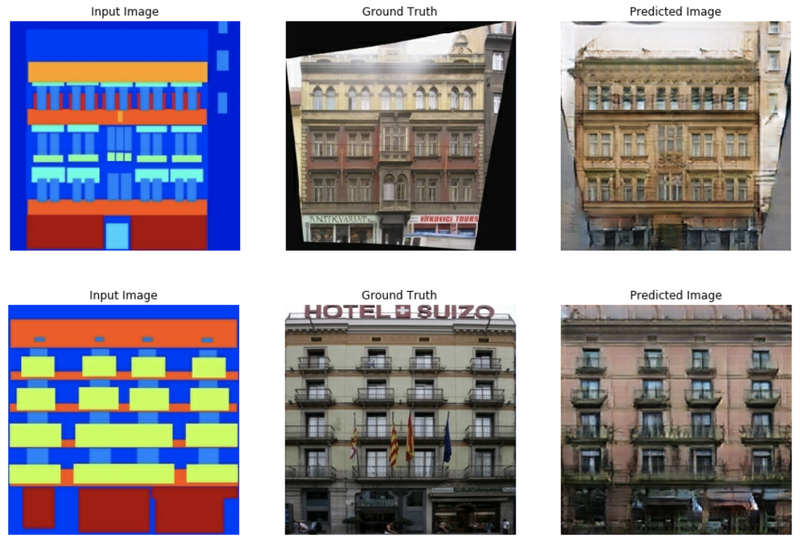

#### Pix2Pix 응용 분야
    - 스케치로 그려진 그림을 실사화하기
    - 흑백 사진을 컬러로 변환하기
    - 위성사진을 지도 이미지로 변환하기
    - 낮에 찍힌 사진을 밤 배경의 사진으로 변환하기

#### Pix2Pix 관련 논문
    - https://arxiv.org/pdf/1611.07004.pdf

[목차로 돌아가기🧾](#목차)

---

## cyclegan

#### CycleGAN은 한 이미지와 다른 이미지를 번갈아 가며 Cyclic하게 변환시킬 수 있다.
    - 한 방향으로의 변환만 가능한 Pix2Pix와 달리 CycleGAN은 양방향으로의 이미지 변환이 가능
    - 실사 이미지를 그림으로 바꾸는 것과 그림을 실사 이미지로 바꾸는 것 두 가지가 모두 가능
    - 그림과 사진의 쌍으로 이루어진 데이터셋이 필요했던 Pix2Pix와 달리, CycleGAN은 쌍이 필요하지 않음
    - 쌍으로 된 데이터(paired data)가 필요 없다는 것은 데이터를 구하기 훨씬 쉽고, 라벨을 붙이는 주석(annotation) 비용이 필요 없다.

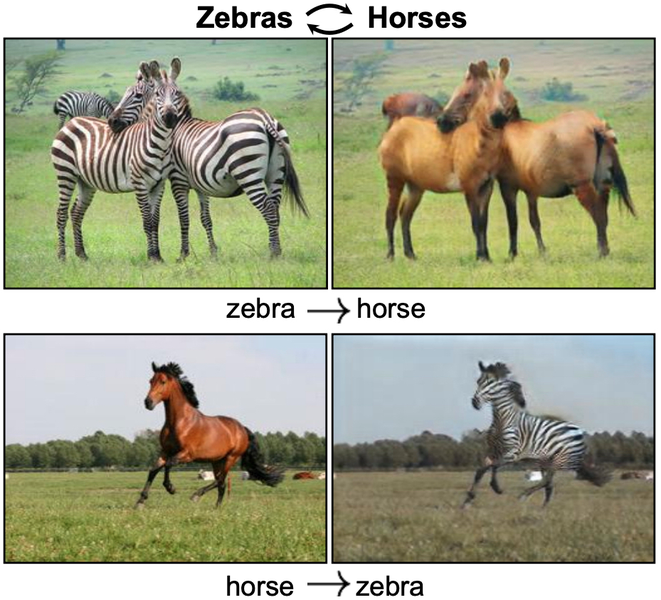

[목차로 돌아가기🧾](#목차)

---

## neural style transfer

#### Style Transfer는 이미지의 스타일을 변환시켜주는 모델
    - 전체 이미지의 구성을 유지하고 싶은 Base Image와 입히고 싶은 스타일이 담긴 Style Image 두 장을 활용해 새로운 이미지를 만들어 내는 모델

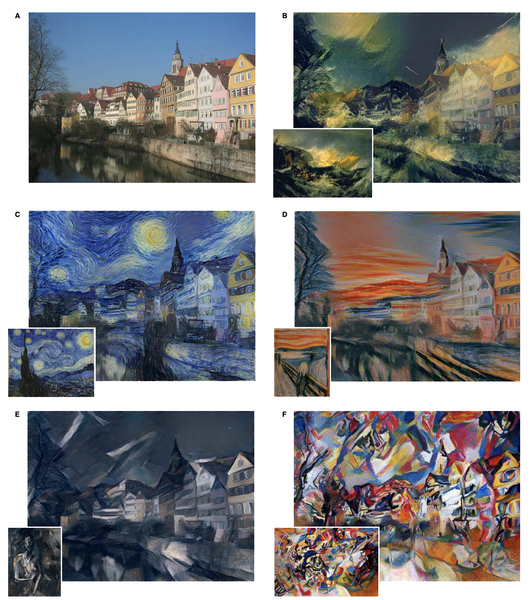

- 여섯 개의 이미지 중 왼쪽 맨 위의 이미지가 Base Image이고, 나머지 다섯 개의 이미지에 작게 붙어있는 이미지가 Style Image

[목차로 돌아가기🧾](#목차)

---

## fashion mnist

#### Fashion MNIST 깃허브
    - https://github.com/zalandoresearch/fashion-mnist

####  Fashion MNIST 데이터셋 정보
    - 이미지 크기: 28x28
    - 이미지 수: 70,000장 (training set 60,000장 / test set 10,000장)
    - 카테고리:
        0: T-shirt/top
        1: Trouser
        2: Pullover
        3: Dress
        4: Coat
        5: Sandal
        6: Shirt
        7: Sneaker
        8: Bag
        9: Ankle boot

In [2]:
# 관련 라이브러리 불러오기
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow", tf.__version__)

tensorflow 2.6.0


In [3]:
# y_train, y_test에 해당하는 데이터를 쓰지 않기 때문에 코드에서 _ (언더스코어)로 해당 데이터들은 무시한다.
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_x, _), (test_x, _) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
# 각 픽셀은 0~255 사이의 정숫값을 가진다.
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


In [5]:
train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화한다.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [6]:
# 데이터셋의 shape 확인
train_x.shape

(60000, 28, 28)

In [7]:
train_x = train_x.reshape(train_x.shape[0],
                         train_x.shape[1],
                         train_x.shape[2],
                         1).astype('float32')
train_x.shape

(60000, 28, 28, 1)

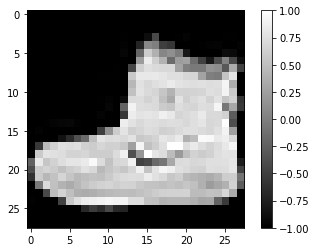

In [8]:
plt.imshow(train_x[0].reshape(28, 28), cmap='gray') # cmap인자를 'gray'로 설정하면 컬러이미지를 그레이스케일로 변환해준다.
plt.colorbar()
plt.show()

- 픽셀에는 정규화 해준 대로 -1 ~ 1 사이의 값을 가지고, -1이 가장 어두운 검은색, 1이 가장 밝은 흰색을 띤다고 표시되어 있음

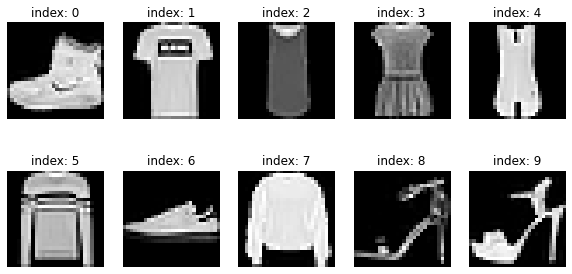

In [9]:
# for문(반복문)을 활용해 10개의 이미지 한번에 출력
plt.figure(figsize=(10, 5))

for i in range(10):
    # i에 +1을 해주는 이유는 range의 범위가 0~9까지 되어 있기 때문
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x[i].reshape(28, 28), cmap='gray')
    plt.title(f'index: {i}')
    plt.axis('off')
plt.show()

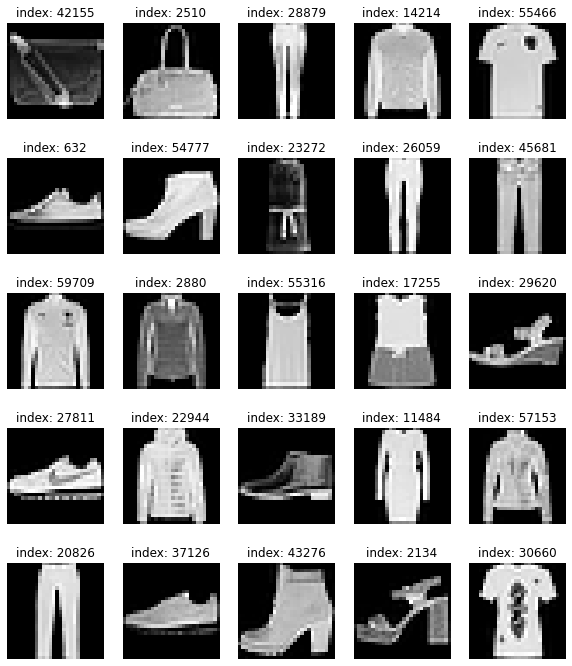

In [10]:
plt.figure(figsize=(10, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    random_index = np.random.randint(1, 60000)
    plt.imshow(train_x[random_index].reshape(28, 28), cmap='gray')
    plt.title(f'index: {random_index}')
    plt.axis('off')
plt.show()

In [11]:
BUFFER_SIZE = 60000

# 모델이 한 번에 학습할 데이터의 양
BATCH_SIZE = 256

In [12]:
# from_tensor_slices() 함수를 사용하면 리스트, 넘파이, 또는 텐서플로우의 텐서 자료형에서 데이터셋을 만들 수 있다.
# train_x라는 넘파이 배열(numpy ndarray)형 자료를 섞고, 이를 배치 사이즈에 따라 나눠준다.
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

print(train_dataset)

<BatchDataset shapes: (None, 28, 28, 1), types: tf.float32>


In [13]:
for batch in train_dataset:
    print(batch.shape)
    break

(256, 28, 28, 1)


In [14]:
iterator = iter(train_dataset)
print('done')

done


In [15]:
batch = next(iterator)
print(batch)

tf.Tensor(
[[[[-1.        ]
   [-1.        ]
   [-1.        ]
   ...
   [-1.        ]
   [-1.        ]
   [-1.        ]]

  [[-1.        ]
   [-1.        ]
   [-1.        ]
   ...
   [-1.        ]
   [-1.        ]
   [-1.        ]]

  [[-1.        ]
   [-1.        ]
   [-1.        ]
   ...
   [-1.        ]
   [-1.        ]
   [-1.        ]]

  ...

  [[-1.        ]
   [-1.        ]
   [-1.        ]
   ...
   [-1.        ]
   [-1.        ]
   [-1.        ]]

  [[-1.        ]
   [-1.        ]
   [-1.        ]
   ...
   [-1.        ]
   [-1.        ]
   [-1.        ]]

  [[-1.        ]
   [-1.        ]
   [-1.        ]
   ...
   [-1.        ]
   [-1.        ]
   [-1.        ]]]


 [[[-1.        ]
   [-1.        ]
   [-1.        ]
   ...
   [-1.        ]
   [-1.        ]
   [-1.        ]]

  [[-1.        ]
   [-1.        ]
   [-1.        ]
   ...
   [-1.        ]
   [-1.        ]
   [-1.        ]]

  [[-1.        ]
   [-1.        ]
   [-1.        ]
   ...
   [-1.        ]
   [-1.        ]


[목차로 돌아가기🧾](#목차)

---

## 생성자 구현

#### 생성자의 목표
    - 생성한 Fake Image를 판별자가 진짜라고 판단하도록 속이는 것

In [16]:
def make_generator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Second: Reshape layer
    model.add(layers.Reshape((7, 7, 256)))

    # Third: Conv2DTranspose layer
    
    # Conv2DTranspose 층은 일반적인 Conv2D와 반대로 이미지 사이즈를 넓혀주는 층
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    
    # 신경망의 가중치가 폭발하지 않도록 가중치 값을 정규화↓
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(1, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

In [17]:
# 생성 모델을 generator라는 변수로 생성
generator = make_generator_model()
print('done')

done


In [18]:
# 모델 세부 내용인 summary를 출력
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0

In [20]:
# 가우시안 분포에서 뽑아낸 랜덤 벡터로 이루어진 shape=(1, 100)의 형상을 가지는 랜덤 노이즈 벡터를 생성
noise = tf.random.normal([1, 100])

In [21]:
generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 28, 28, 1])

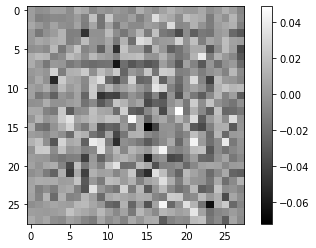

In [22]:
# 0번째와 3번째 축의 인덱스를 0으로 설정해서 (28, 28) shape의 이미지를 꺼낸다.
plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.colorbar()
plt.show()

[목차로 돌아가기🧾](#목차)

---

## 판별자 구현

#### 판별자의 목표
    - 성자가 생성한 가짜 이미지를 가짜로, 진짜 이미지를 진짜로 잘 판별하는 것

#### 판별자는 가짜 이미지와 진짜 이미지를 입력받으면 각 이미지 별로 '진짜라고 판단하는 정도'의 값을 출력해야 한다.

In [24]:
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer(28, 28, 1) -> (14, 14, 64)
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer (14, 14, 64) -> (7, 7, 128)
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer (7, 7, 128) - > (7*7*128)
    # 3차원 이미지를 1차원으로 쭉 펴서 7x7x128=6272, 즉 (1, 6272) 형상의 벡터로 변환
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

In [25]:
# 판별 모델을 discriminator라는 변수 이름으로 생성하고, 모델 세부 내용인 summary를 출력
discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [26]:
# 생성했던 가짜 이미지를 판별자에 입력
decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00104096]], dtype=float32)>

[목차로 돌아가기🧾](#목차)

---

## 손실함수와 최적화함수

#### GAN은 손실함수로 교차 엔트로피(Cross Entropy)를 사용
    - 점점 가까워지기 원하는 두 값이 얼마나 큰 차이가 나는지를 정량적으로 계산할 때 쓰인다.
    - 판별자는 한 개의 이미지가 가짜인지 진짜인지 나타내는 2개 클래스 간 분류 문제를 풀어야 하므로, 이진 교차 엔트로피(binary cross entropy)를 사용

#### Real Image에 대한 라벨을 1, Fake Image에 대한 라벨을 0으로 두었을 때,
   

 - **생성자** : 판별자가 Fake Image에 대해 판별한 값, 즉 D(fake_image) 값이 **1에** **가까워지는** **것**
 - **판별자** : Real Image 판별값, 즉 D(real_image)는 1에, Fake Image 판별값, 즉 D(fake_image)는 **0에** **가까워지는** **것**

In [27]:
# keras에서 이진 교차 엔트로피 불러오기
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

#### cross_entropy를 활용해 계산할 loss들은 fake_output와 real_output, 두 가지를 활용
    - fake_output : 생성자가 생성한 Fake Image를 구분자에 입력시켜서 판별된 값, 즉 D(fake_image)
    - real_output : 기존에 있던 Real Image를 구분자에 입력시켜서 판별된 값, 즉 D(real_image)

In [28]:
vector = [[1, 2, 3],
          [4, 5, 6]]

# ones_like함수는 특정 벡터와 동일한 크기이면서 값은 1 또는 0으로 가득 채워진 벡터를 만들고 싶을 때 사용
tf.ones_like(vector)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)>

#### generator_loss

In [29]:
# cross_entropy(tf.ones_like(fake_output), fake_output) 값은 fake_output이 (Real Image를 의미하는) 1에 가까울수록 작은 값을 가진다.
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

#### discriminator_loss

- real_output 값은 1에 가까워지기를, fake_output 값은 0에 가까워지기를 바라므로, 두 가지 loss값을 모두 계산
- real_output은 1로 채워진 벡터와, fake_output은 0으로 채워진 벡터와 비교

In [30]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

#### discriminator accuracy

In [32]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

#### optimizer 설정

In [33]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [34]:
# 100차원의 노이즈를 총 16개, (16, 100) 형상의 벡터 생성
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

[목차로 돌아가기🧾](#목차)

---

## 모델 훈련

In [36]:
import numpy as np
import tensorflow as tf

def f(x, y):
  print(type(x))
  print(type(y))
  return x ** 2 + y

x = np.array([2, 3])
y = np.array([3, -2])
f(x, y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([7, 7])

In [39]:
import numpy as np
import tensorflow as tf

# @tf.function은 직접 session을 열어서 학습했다가, 
# 학습이 완료되면 다시 닫아주는 등의 번거로운 과정을 내부적으로 처리해서 더욱 편리하게 학습시킬 수 있게 해줌

@tf.function    # 위와 동일한 함수이지만 @tf.function 데코레이터가 적용\
def f(x, y):
  print(type(x))
  print(type(y))
  return x ** 2 + y

x = np.array([2, 3])
y = np.array([3, -2])
f(x, y)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected indent (<unknown>, line 2)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected indent (<unknown>, line 2)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>


<tf.Tensor: shape=(2,), dtype=int64, numpy=array([7, 7])>

- 데코레이터 관련 링크
    - https://schoolofweb.net/blog/posts/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%8D%B0%EC%BD%94%EB%A0%88%EC%9D%B4%ED%84%B0-decorator/

In [40]:
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

#### train_step 함수 상세

|이름|설명|
|:---:|:---|
|입력 데이터|Real Image 역할을 할 images 한 세트를 입력으로 받음|
|생성자 입력 노이즈|generator가 FAKE IMAGE를 생성하기 위한 noise를 images 한 세트와 같은 크기인 BATCH_SIZE 만큼 생성함|
|tf.GradientTape()|가중치 갱신을 위한 Gradient를 자동 미분으로 계산하기 위해 with 구문 열기|
|generated_images 생성|generator가 noise를 입력받은 후 generated_images 생성|
|discriminator 판별|discriminator가 Real Image인 images와 Fake Image인 generated_images를 각각 입력받은 후 real_output, fake_output 출력|
|loss 계산|fake_output, real_output으로 generator와 discriminator 각각의 loss 계산|
|accuracy 계산|fake_output, real_output으로 discriminator의 정확도 계산|
|gradient 계산|gen_tape와 disc_tape를 활용해 gradient를 자동으로 계산|
|모델 학습|계산된 gradient를 optimizer에 입력해 가중치 갱신|
|리턴값|이번 스텝에 계산된 loss와 accuracy를 리턴|

In [41]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

In [42]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

In [43]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [44]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

In [45]:
save_every = 5
EPOCHS = 50

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

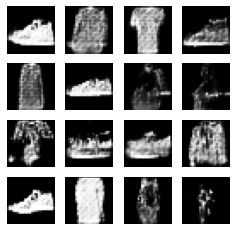

Time for training : 776 sec


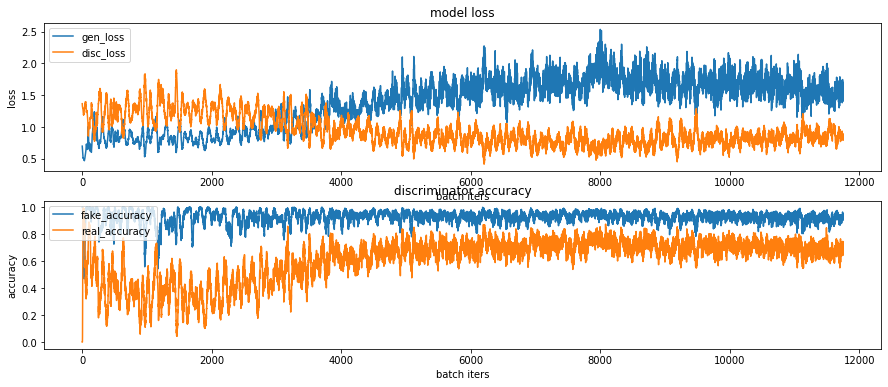

CPU times: user 6min 36s, sys: 1min 20s, total: 7min 56s
Wall time: 12min 57s


In [46]:
%%time
train(train_dataset, EPOCHS, save_every)

# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/dcgan_newimage/fashion/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권합니다.

In [59]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif

-rw-r--r-- 1 root root 1135257 Jul 29 06:28 /aiffel/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif
